# Project 2 

In [1]:
import pandas as pd
import resources as helpers    # Has data_exploration, data_preperation and data_visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
from itertools import combinations as cm
#warnings.filterwarnings("ignore")
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')    #Read the file
helpers.de.look_dataframe(df)    #Look at dataframe
helpers.dp.correlation_with(df, 'price')
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])    # Look at the columns with missing values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Column Names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long']
Number of observation: 30155
Duplicates detected


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


N/A detected
Columns with NaN:  ['heat_source', 'sewer_system']
heat_source has 8/30155 unique observations. 
Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64
Number of missing values: 32
sewer_system has 5/30155 unique observations. 
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64
Number of missing values: 14


,heat_source,sewer_system
0,Gas,PUBLIC
1,Oil,PUBLIC
2,Gas,PUBLIC
3,Gas,PUBLIC
4,Electricity,PUBLIC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   heat_source   30123 non-null  object
 1   sewer_system  30141 non-null  object
dtypes: object(2)
memory usage: 471.3+ KB


None

### Column Infos

In [3]:
all_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'
               , 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source'
               , 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built'
               , 'yr_renovated', 'address', 'lat', 'long']

obj_categorical = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source' , 'sewer_system']
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',]
num_categorical = ['yr_renovated', 'yr_built',  'bedrooms', 'bathrooms', 'floors']
                   
useless_columns = ['id', 'date', 'address', 'lat', 'long']

## **Actions Needed**
1. Delete duplicates
2. Remove missing values
3. Remove unnecessary rows and columns
4. Remove Outliers
5. Group Small samples categories

## Data Preperations
**Main Dataframe with the least changes** <br>
df_cleaned: Removed outliers, rows, columns and replaced grade naming convention <br>
df_num: All the columns that are numbers including price <br>
df_obj: All the columns that are objects not including price <br>
**Used mainly for plotting** <br>
df_num_cat: All the columns that are categorical integers with price <br>
df_obj_cat All the columns that are categorical objects with price <br>
df_num_only All the columns that are continuous data type with price <br>
**Results with correlation (Only numerical variables)** <br>
corr_all: zip file for the correlation from df_cleaned <br>
best_corr: Dictionary of the corr_all sorted by the best correlation, cut off the last three due to usage <br>

In [4]:
df_cleaned = helpers.dp.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = helpers.dp.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_columns, axis = 1, inplace = True)    # Drop columns that wont be useful right now

df_cleaned['house_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_built'] 
df_cleaned['relative_age'] = df_cleaned['house_age']
df_cleaned['relative_age'].loc[df_cleaned['yr_renovated'] > 0] = df_cleaned['yr_built'].max() - df_cleaned['yr_renovated']

df_cleaned['sqft_living'] = df_cleaned['sqft_living'] - df_cleaned['sqft_living'].min()

## Map dictionary to change the strings in integer. 
grade_map = {'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10, '5 Fair': 5, 
             '11 Excellent': 11, '4 Low': 4, '12 Luxury':12, '3 Poor': 3, '13 Mansion': 13, '2 Substandard' : 2}
df_cleaned.replace(grade_map, inplace= True)

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of Missing Values: 0
Number of duplicates: 1
Removed 1 duplicates
Number of duplicates: 0
1214 observations were removed. 


C:\Users\Tommy\AppData\Local\Temp\ipykernel_14572\2284496931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(labels = useless_columns, axis = 1, inplace = True)    # Drop columns that wont be useful right now
C:\Users\Tommy\AppData\Local\Temp\ipykernel_14572\2284496931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['house_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_built']
C:\Users\Tommy\AppData\Local\Temp\ipykernel_14572\2284496931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [5]:
### General setup that prepares for the modeling
columns = [column for column in df_cleaned.columns if (column != 'grade') and (column != 'price')]
#df_w_dummies = pd.get_dummies(df_cleaned, drop_first= True)
best_corr = helpers.dp.correlation_with(df_cleaned, 'price')    ## Helper function that return the variables that correlate to a given column and return them as a list
 ## The best correlating parameter

## Data Models

### All Continuous Model

In [6]:
best_corr

[('sqft_living', 0.6019551412003955),
 ('grade', 0.5765477030786343),
 ('sqft_above', 0.5173796804461511),
 ('bathrooms', 0.462321402393885),
 ('bedrooms', 0.33269818502948795),
 ('sqft_patio', 0.2645639219221229),
 ('sqft_garage', 0.25909450168968734),
 ('sqft_basement', 0.21228905462629066),
 ('floors', 0.2067175190595692),
 ('yr_built', 0.09057621374076542),
 ('sqft_lot', 0.07916417764276389),
 ('yr_renovated', 0.0648972654556037),
 ('house_age', -0.09057621374076537),
 ('relative_age', -0.11932571621880085)]

### Square Feet Living Model

In [7]:
#1. Only sqft_living
X = df_cleaned['sqft_living']
y = df_cleaned['price']
model_1 = sm.OLS(y, sm.add_constant(X))
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.62e+05   6086.650     43.052      

### Square Feet Living and Grade

In [8]:
#2. Only sqft_living and grade
X = df_cleaned[['sqft_living', 'grade']]
y = df_cleaned['price']
model_2 = sm.OLS(y, sm.add_constant(X))
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -4.1206e+05
No. Observations:               28896   AIC:                         8.241e+05
Df Residuals:                   28893   BIC:                         8.241e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.262e+05   1.79e+04    -35.065      

### Many Parameters

In [9]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_cleaned[['sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age']]
y = df_cleaned['price']
model_3 = sm.OLS(y, sm.add_constant(X))
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3089.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -4.1095e+05
No. Observations:               28896   AIC:                         8.219e+05
Df Residuals:                   28887   BIC:                         8.220e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.148e+06   2.32e+04    -49.532

## Dummy Models

In [10]:
df_dummy = pd.get_dummies(df_cleaned, drop_first= True)

### All Parameters 

In [11]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_dummy[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'house_age', 'relative_age',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED']]
y = df_dummy['price']
model_dum_1 = sm.OLS(y, sm.add_constant(X))
result_dum_1 = model_dum_1.fit()
print(result_dum_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     824.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -4.1029e+05
No. Observations:               28896   AIC:                         8.206e+05
Df Residuals:                   28862   BIC:                         8.209e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Grouped dummies

In [12]:
## All categories and the number of times they appear
df_other = df_cleaned.copy()
for column in ['view', 'condition','heat_source', 'sewer_system']:
    replace = df_other[column].value_counts()[df_other[column].value_counts()< 300].index
    df_other[column].replace(replace, value= 'other',inplace= True)
df_dummy_2 = pd.get_dummies(df_other, drop_first= True)

In [13]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_dummy_2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'house_age', 'relative_age',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_GOOD', 'view_NONE',
       'condition_Good','condition_Very Good',
       'heat_source_Gas',
       'heat_source_Oil',
       'sewer_system_PUBLIC', ]]
y = df_dummy_2['price']
model_dum_2 = sm.OLS(y, sm.add_constant(X))
result_dum_2 = model_dum_2.fit()
print(result_dum_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -4.1031e+05
No. Observations:               28896   AIC:                         8.207e+05
Df Residuals:                   28871   BIC:                         8.209e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4526    

### Taken Out

In [14]:
#3. 'sqft_living', 'grade', 'bedrooms', 'bathrooms','sqft_patio','sqft_garage', 'sqft_basement','relative_age'
X = df_dummy_2[['bedrooms', 'bathrooms', 'sqft_living',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
        'yr_renovated', 'house_age', 'relative_age',
       'waterfront_YES', 'greenbelt_YES',
       'condition_Good','condition_Very Good',
       'sewer_system_PUBLIC', ]]
y = df_dummy_2['price']
model_dum_3 = sm.OLS(y, sm.add_constant(X))
result_dum_3 = model_dum_3.fit()
print(result_dum_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1664.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -4.1044e+05
No. Observations:               28896   AIC:                         8.209e+05
Df Residuals:                   28879   BIC:                         8.211e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.294e+06   2

## Data Visiualization

### Continuous Data Type 

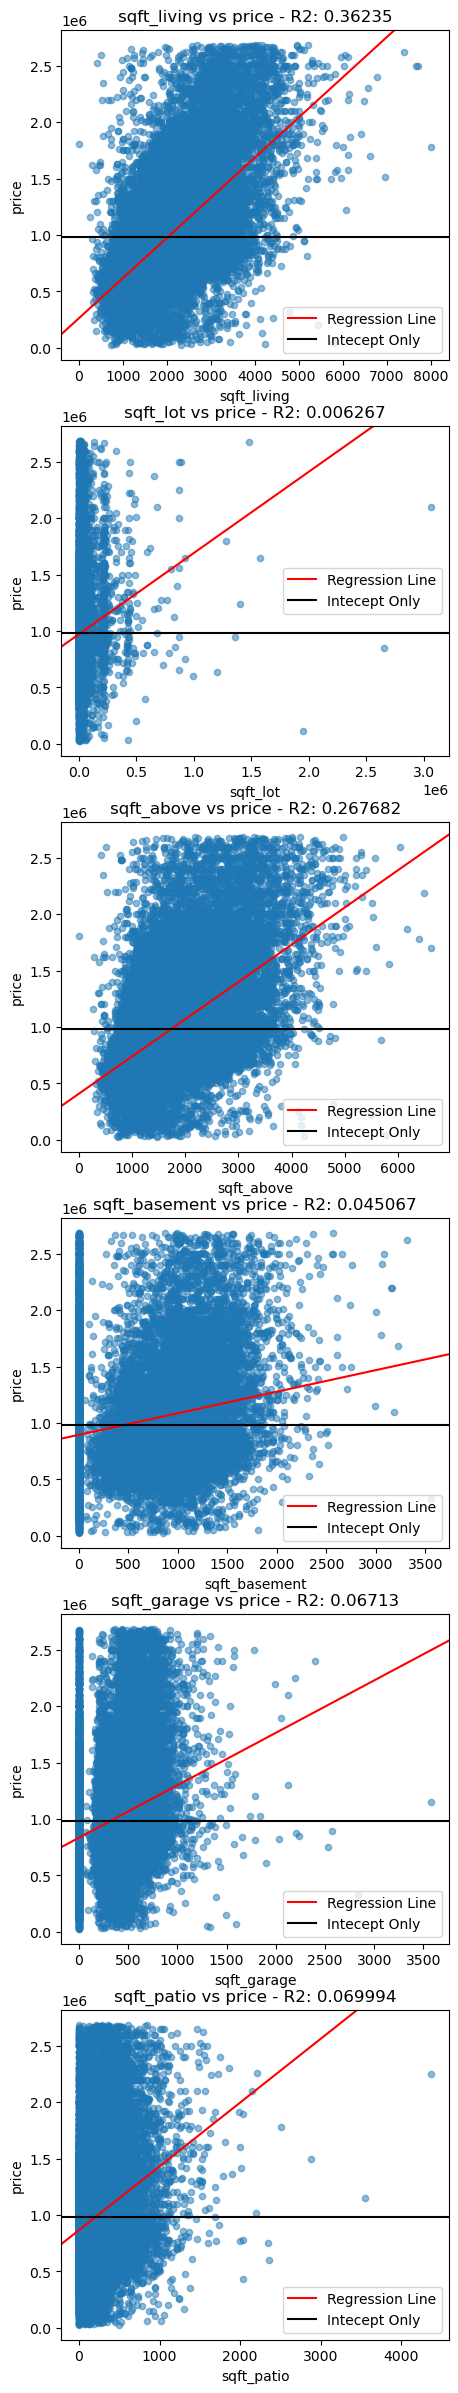

In [15]:
## Seperate the contiuous data type with the categorical data type for modelling and prepping
df_prepped_continuous = df_cleaned[continuous].copy()

models = []
results = []
for column in continuous:
    model, result = helpers.dp.create_model(df_prepped_continuous, column, 'price')
    models.append(model)
    results.append(result)
fig, ax = helpers.dv.plot_dataframe(df_prepped_continuous, continuous[1:], 'price',  size = (5,30), regression= True, results= results[1:]);

### Numeric Scatter

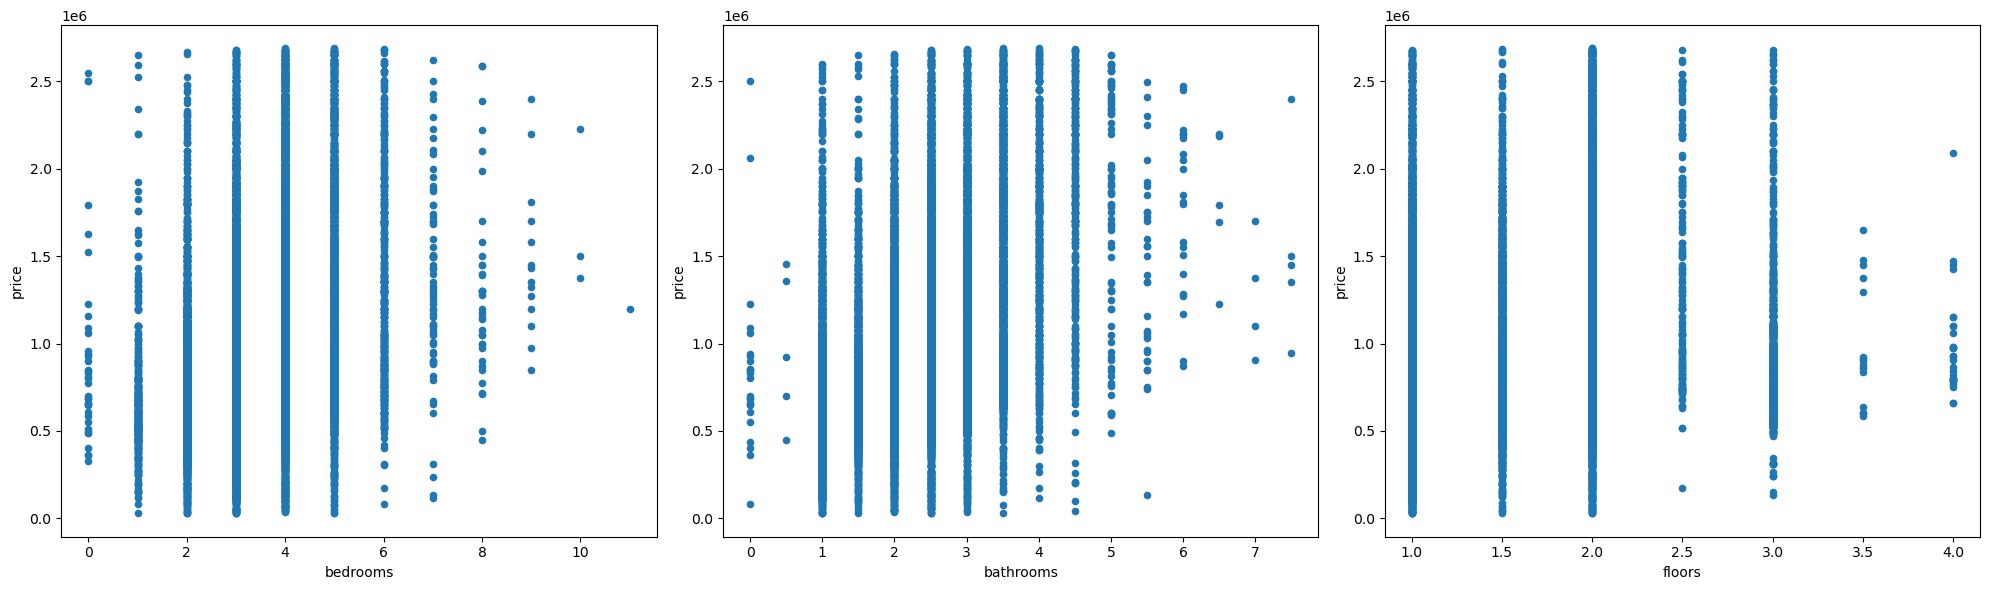

In [36]:
fig, ax = plt.subplots(ncols= 3, figsize = (20,6))
index = 0 
for category in num_categorical[2:]:
    df_cleaned.plot.scatter(category, 'price', ax = ax[index])
    index += 1
plt.tight_layout()

### Categorical Data Type

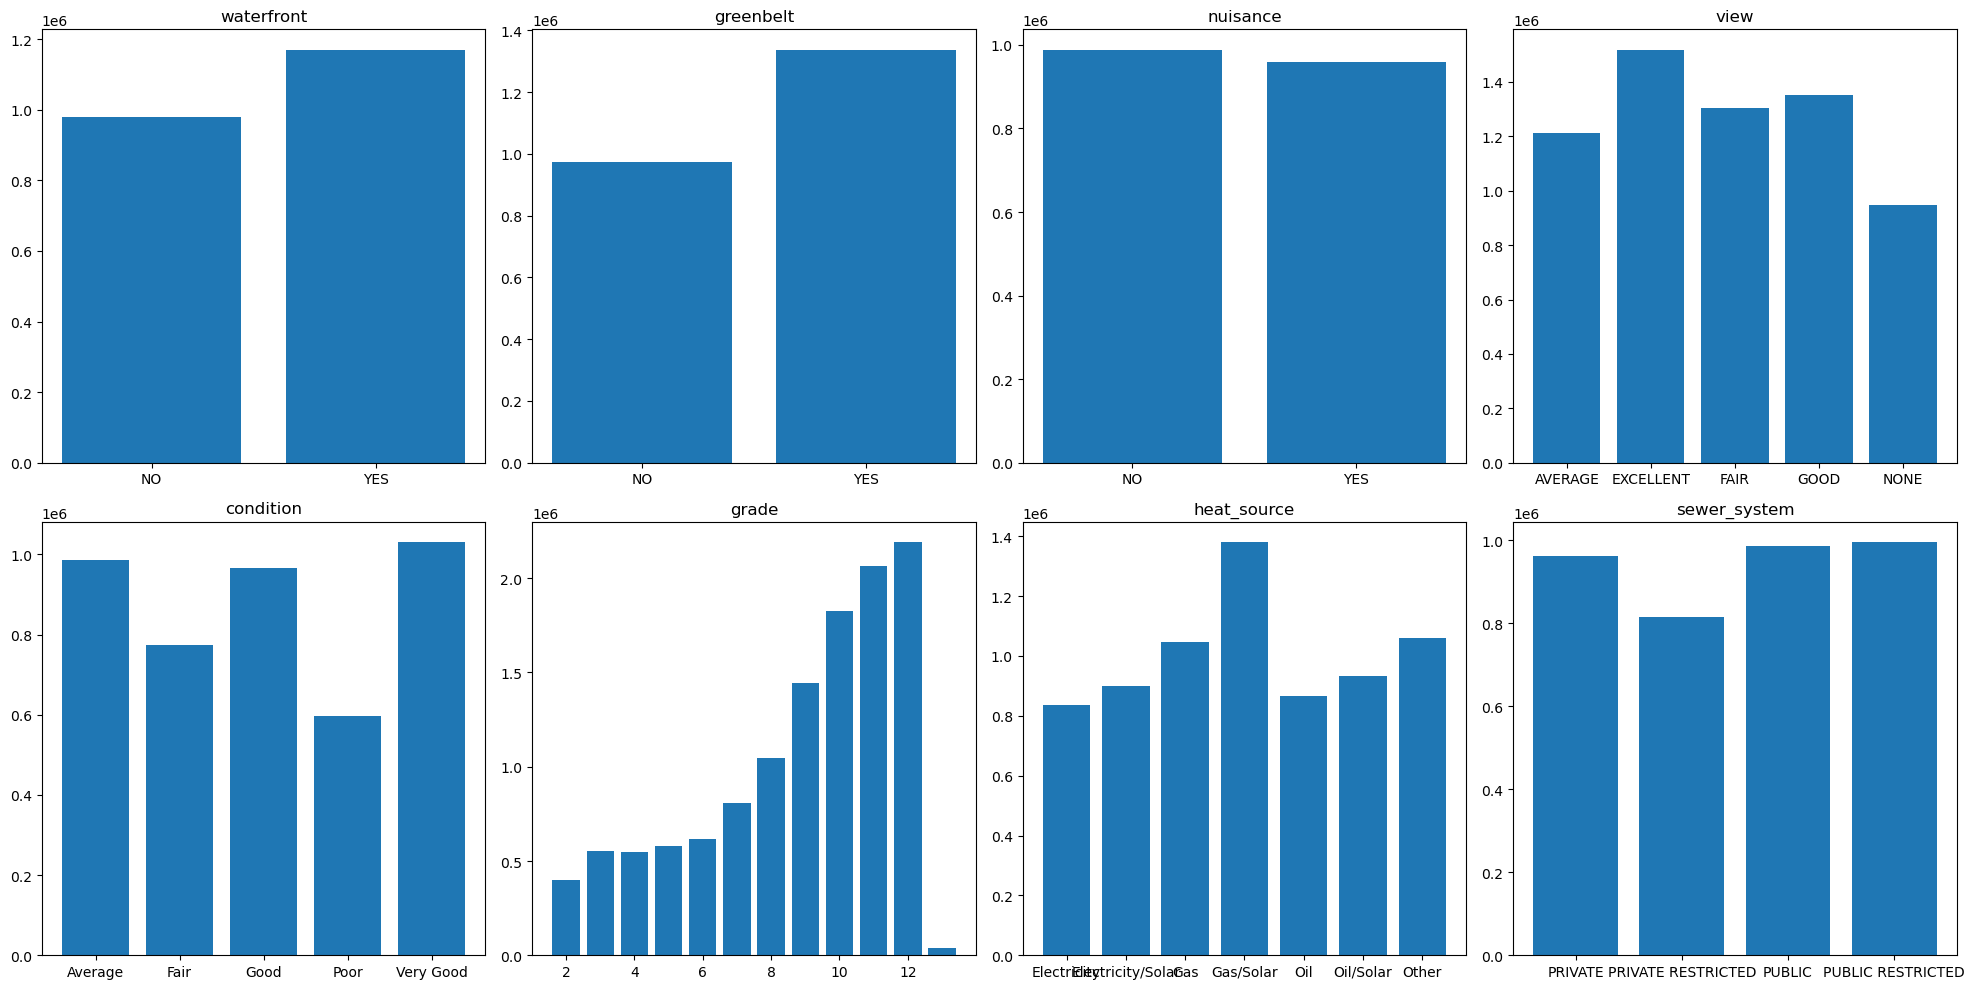

In [21]:
fig, ax = plt.subplots(ncols= 4, nrows = 2, figsize = (20,10))
row = 0 
col = 0
for category in obj_categorical:
    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group)
    ax[row][col].set_title(category)
    df_cleaned[category].value_counts()
    if col == 3:
        row += 1
        col = 0
    else:
        col += 1
plt.tight_layout()

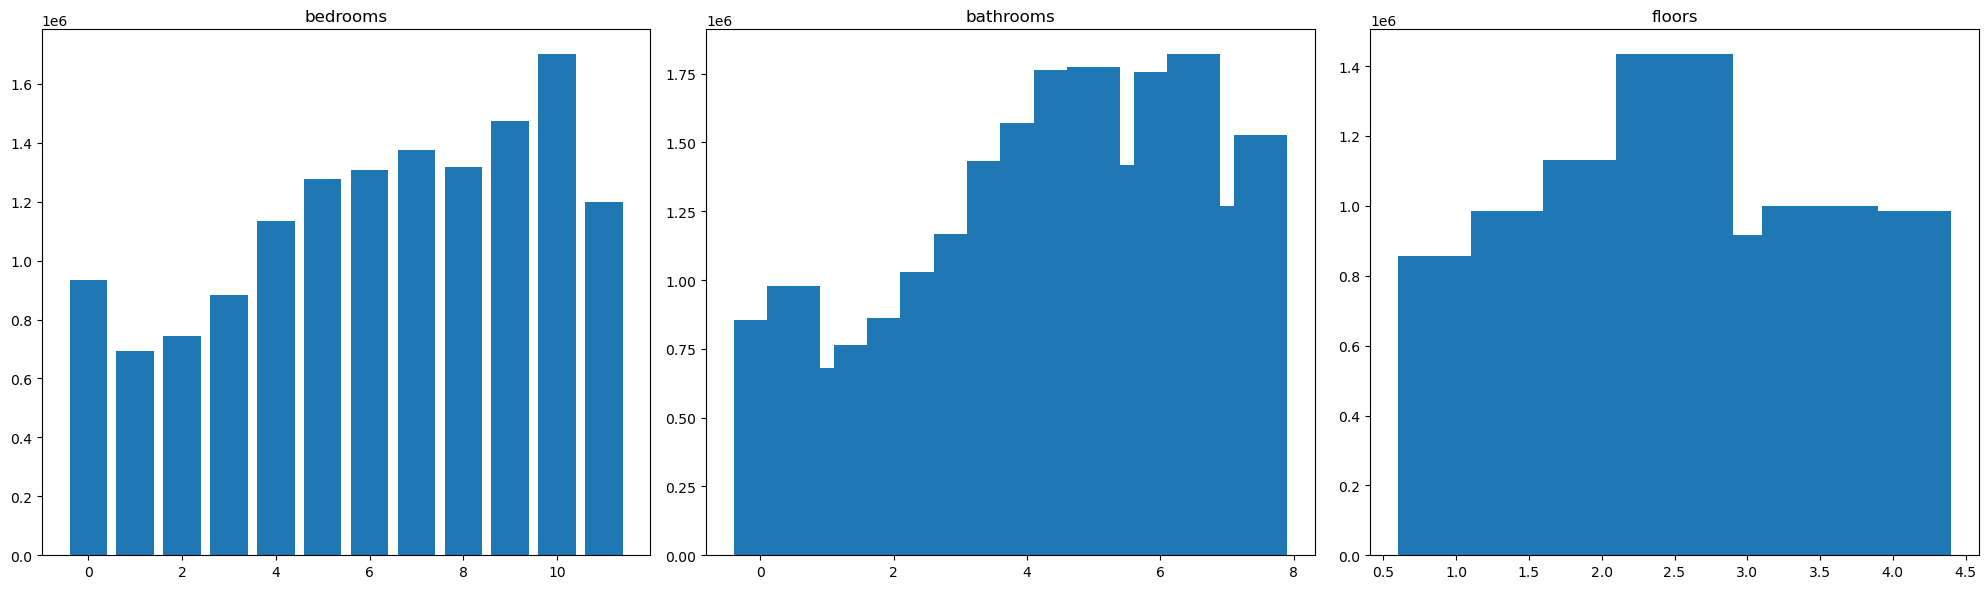

In [33]:
fig, ax = plt.subplots(ncols= 3, figsize = (20,6))
row = 0 
col = 0
for category in num_categorical[2:]:
    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[col].bar((group.index), x_group)
    ax[col].set_title(category)
    df_cleaned[category].value_counts()

    col += 1
plt.tight_layout()

In [24]:
group_waterfront = df_cleaned[['waterfront', 'price']].groupby('waterfront').mean().values
x_group1 = [value[0] for value in group_waterfront.tolist()]
group_greenbelt = df_cleaned[['greenbelt', 'price']].groupby('greenbelt').mean().values
x_group2 = [value[0] for value in group_greenbelt.tolist()]
group_nuisance = df_cleaned[['nuisance', 'price']].groupby('nuisance').mean().values
x_group3 = [value[0] for value in group_nuisance.tolist()]

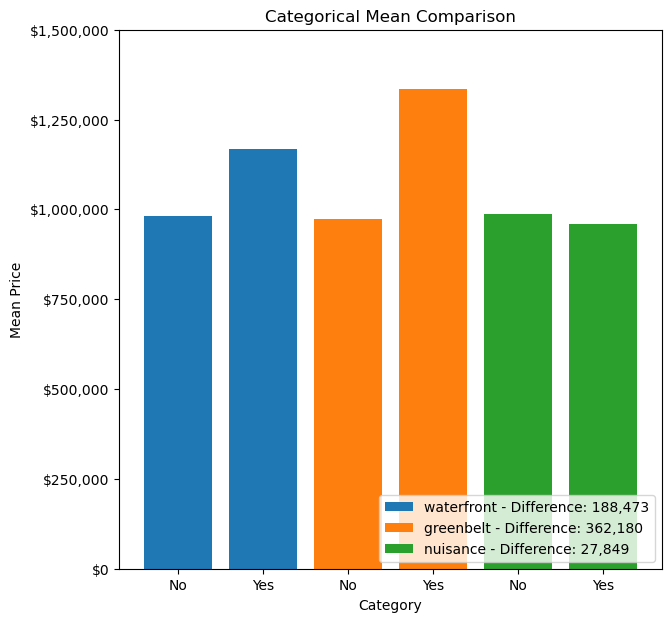

In [25]:
fig, ax = plt.subplots(figsize = (7, 7));    # Setup for plotting 
label = ['waterfront', 'greenbelt', 'nuisance']    #Labels for the legend and labels
r = np.arange(2)    # Spacing for the bar plots
width = 2    # Basic width of each bar
index = 0    # Index through all the groups

### Plot each of the groups side by side for clarity
for group in [x_group1, x_group2, x_group3]:
    ax.bar(r + width * index, group, label = '{} - Difference: {:,}'.format(label[index], abs(round(group[1]-group[0]))));
    index += 1
### Ticks labeling and spacing 
x_ticks = np.arange(6)    
y_ticks = np.arange(0,1750000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]

plt.title('Categorical Mean Comparison');
plt.xlabel('Category')
plt.ylabel('Mean Price');
plt.xticks(x_ticks, ['No','Yes','No','Yes','No','Yes']);

ax.set_yticks(np.arange(0,1750000, 250000));
ax.set_yticklabels(y_ticks_str);

plt.legend(loc = 'lower right');

### Categorical adjustment
There are observation that have very few observation so I will group them up as 'others'. This is only applied to the categorical dataype. <br>
For the numerical observation with few observations, they will be plotted in bar graphs

Results: A house cost more if they are at the waterfront or at a greenbelt. There is a general price increase with the higher conditon and view <br>
None Impactful: Nuisance, whether there is any or not, seems to have no effect on price to make a difference. <br>
Potential Impactful: Heat Source and sewer may have some influence but doesn't seems to be a strong one.  <br>

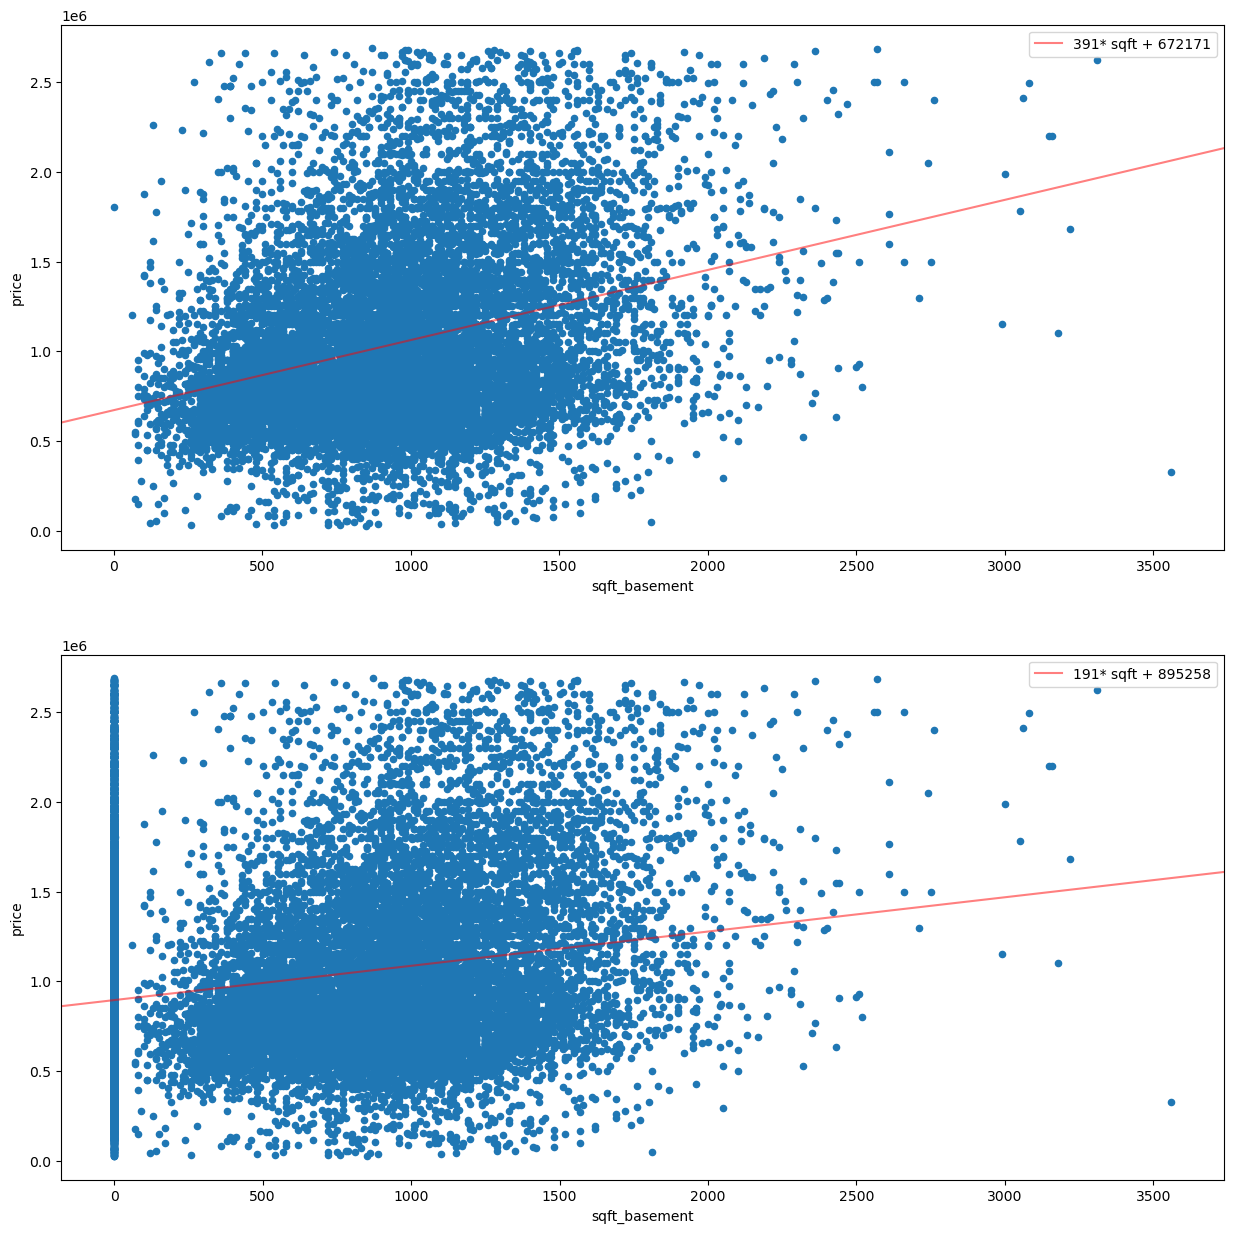

In [37]:
df_basement_0s = df_cleaned.loc[df_cleaned['sqft_basement'] != 0]#.plot.scatter('sqft_basement', y = 'price')
model, result = helpers.dp.create_model(df_basement_0s, 'sqft_basement', 'price')
model2, result2 = helpers.dp.create_model(df_cleaned, 'sqft_basement', 'price')


fig, ax = plt.subplots(nrows= 2, figsize = (15,15))
df_cleaned.loc[df_cleaned['sqft_basement'] != 0].plot.scatter('sqft_basement', y = 'price', ax = ax[0])
sm.graphics.abline_plot(model_results= result , c = 'r', ax = ax[0], alpha = .5, label = '{}* sqft + {}'.format(round(result.params[1]), round(result.params[0])));
ax[0].legend()

df_cleaned.plot.scatter('sqft_basement', y = 'price', ax = ax[1])
sm.graphics.abline_plot(model_results= result2, c = 'r', ax = ax[1], alpha = .5, label = '{}* sqft + {}'.format(round(result2.params[1]), round(result2.params[0])));
ax[1].legend()

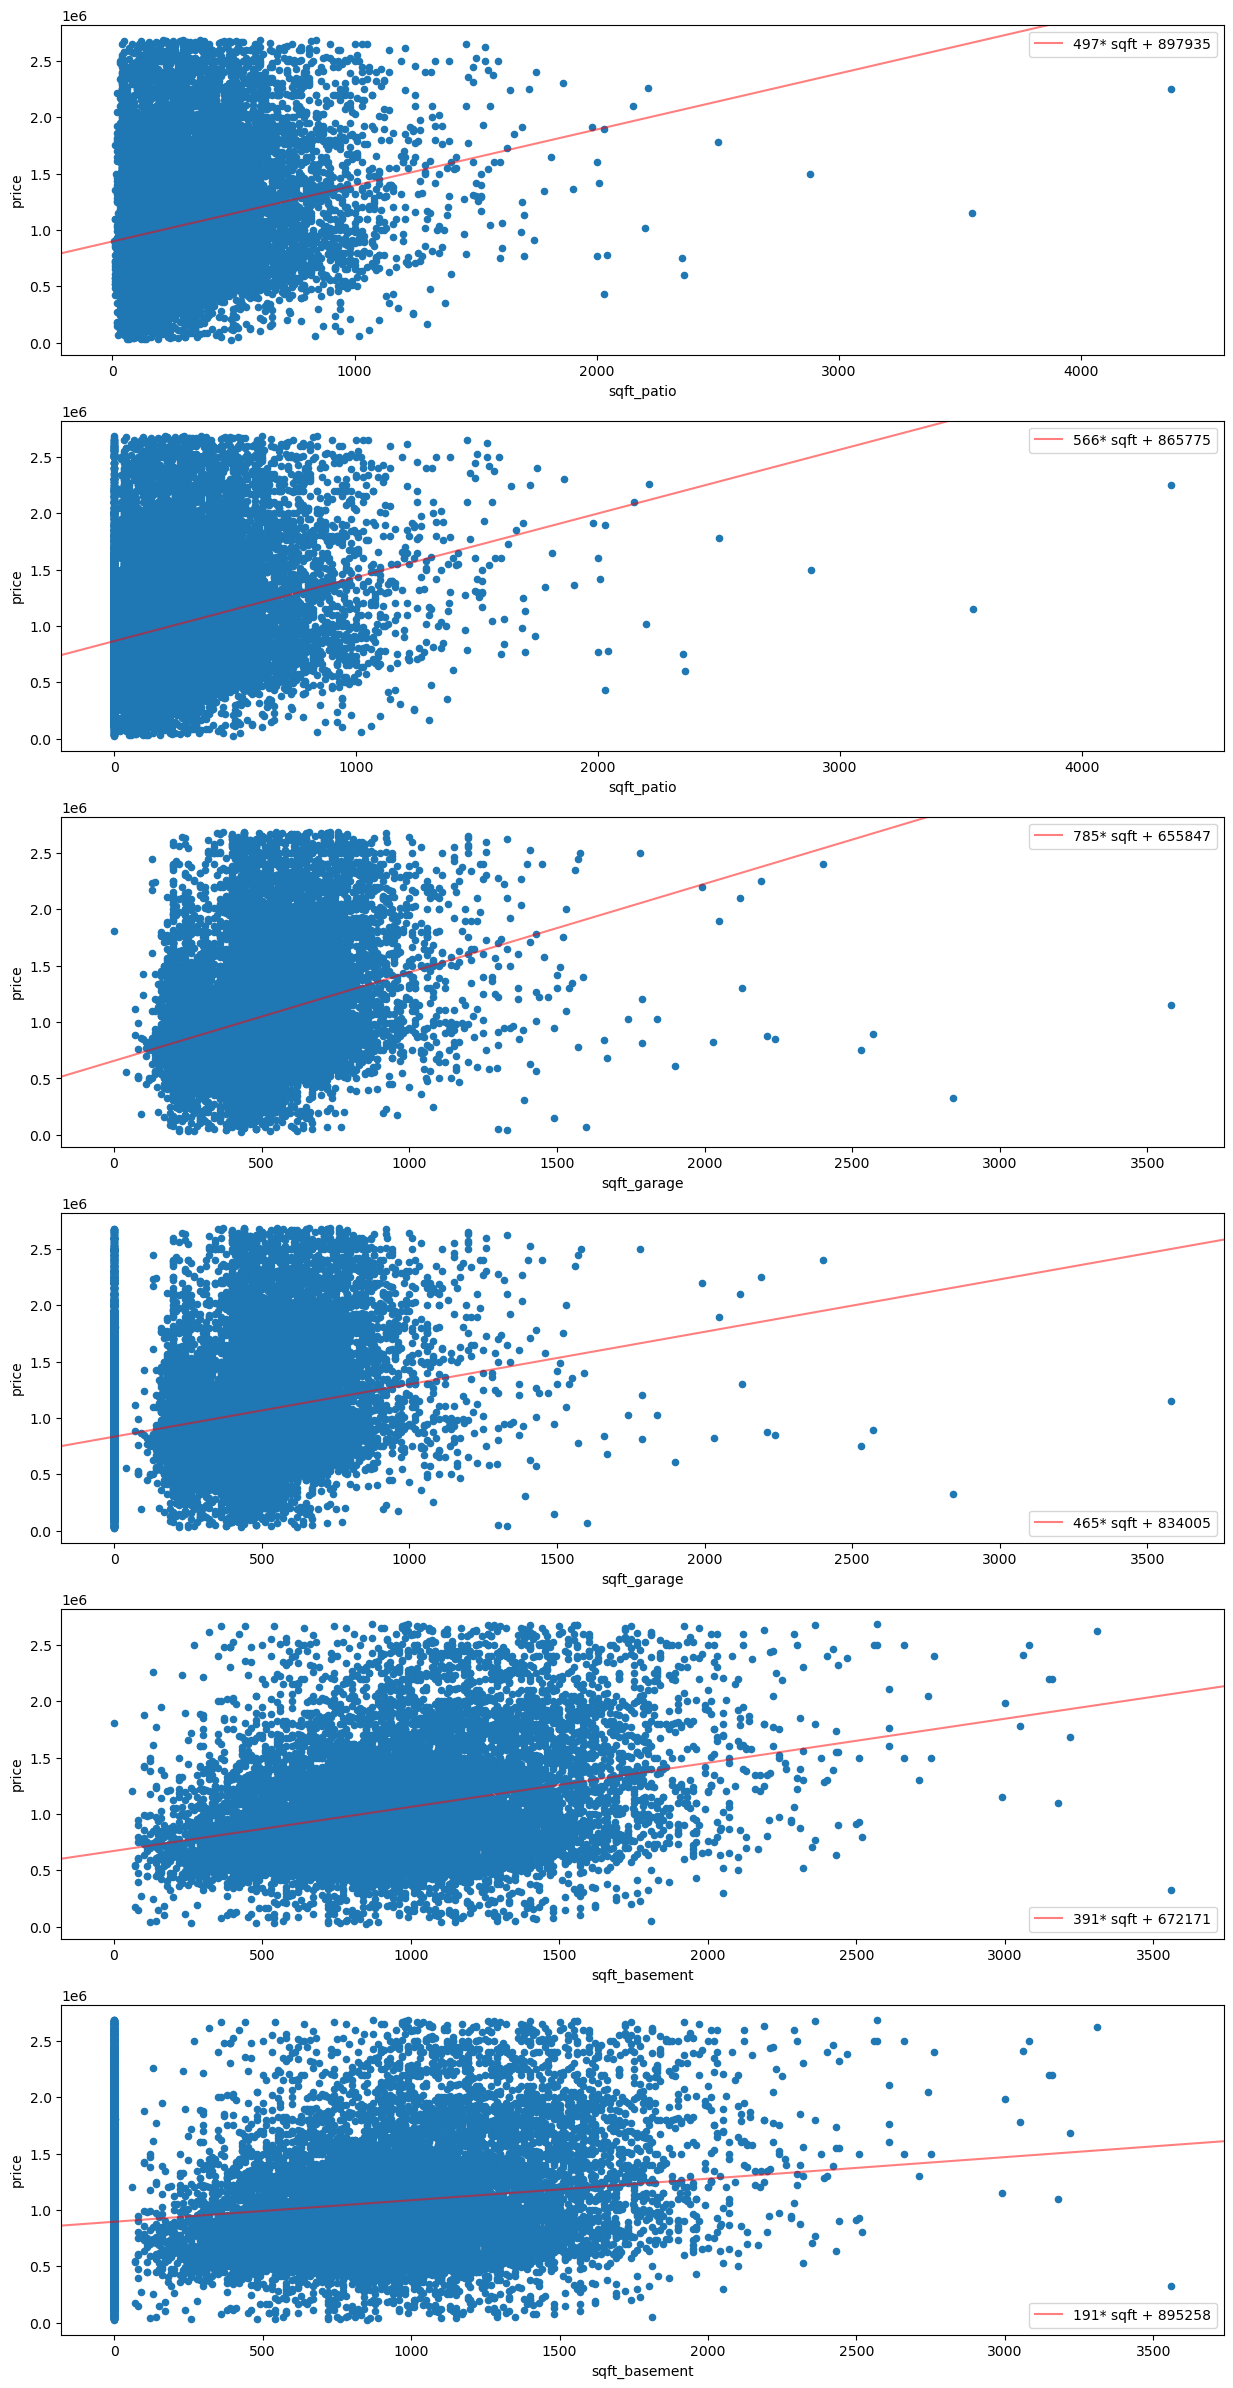

In [38]:
models_sqft = {}
fig, ax = plt.subplots(nrows= 6, figsize = (15,30))
index = 0
for category in ['sqft_patio', 'sqft_garage', 'sqft_basement']:
    df_filtered = df_cleaned.loc[df_cleaned[category] != 0]#.plot.scatter('sqft_basement', y = 'price')
    
    model, result = helpers.dp.create_model(df_filtered, category, 'price')
    model2, result2 = helpers.dp.create_model(df_cleaned, category, 'price')
    
    models_sqft[category] = model;
    
    df_filtered.plot.scatter(category, y = 'price', ax = ax[index])
    sm.graphics.abline_plot(model_results= result , c = 'r', ax = ax[index], alpha = .5, label = '{}* sqft + {}'.format(round(result.params[1]), round(result.params[0])));
    ax[index].legend()

    df_cleaned.plot.scatter(category, y = 'price', ax = ax[index +1 ])
    sm.graphics.abline_plot(model_results= result2, c = 'r', ax = ax[index + 1], alpha = .5, label = '{}* sqft + {}'.format(round(result2.params[1]), round(result2.params[0])));
    ax[index + 1].legend()

    index += 2

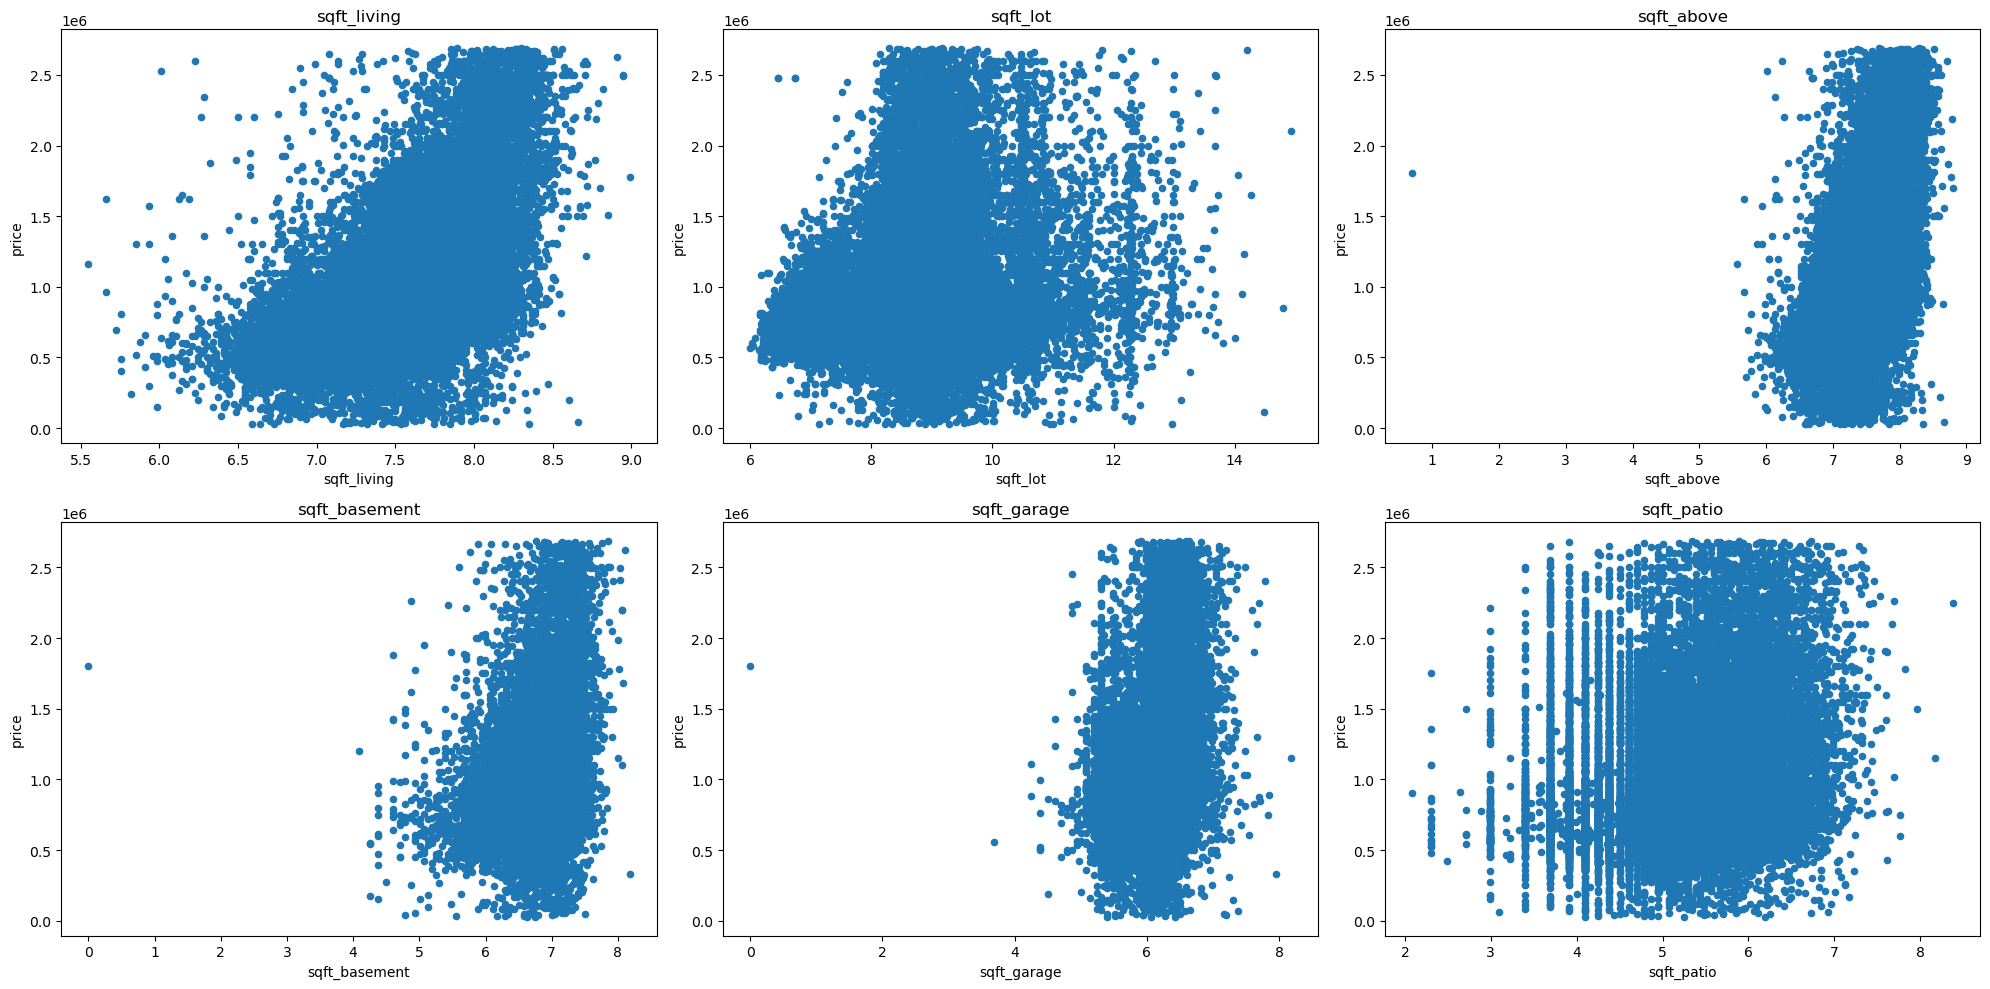

In [77]:
df_logs = {}
for column in  continuous[1:]:
    slice_df = df_cleaned.loc[df_cleaned[column] != 0]
    df_logs[column] = helpers.de.apply_log(slice_df, [column])
    
fig, ax = plt.subplots(ncols= 3, nrows = 2, figsize = (20,10))
row = 0 
col = 0

for variable in continuous[1:]:
    df_logs[variable].plot.scatter(x = variable, y = 'price', ax = ax[row][col])
    ax[row][col].set_title(variable)
    if col == 2:
        row += 1
        col = 0
    else:
        col += 1

plt.tight_layout()